# **Bootcamp Cientista de Dados**
### Aplicação do algoritmo K-Means

O K-Means é um algoritmo de machine learning não supervisionado. Localizado na biblioteca Scikit-learn, é um algoritmo de clusterização de dados muito usado para: 
+ Agrupamento de clientes/usuários similares.
+ Segmentação de mercado.
+ Agrupamento de produtos semelhantes.
+ Agrupamento de usuários em redes sociais.
+ Agrupamento de notícias, documentos.
+ Agrupamento de pacientes para identificar situações de risco.

In [2]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
# pegando a base de dados 'Consumo.csv'
df = pd.read_csv('Consumo.csv', sep=',', encoding='1252')
df.head()

,Cod,Sexo,Idade,Salario Anual (milhares),Score Gastos (0-100)
0,1,Masculino,19,17,39
1,2,Masculino,21,17,81
2,3,Feminino,20,19,6
3,4,Feminino,23,19,77
4,5,Feminino,31,20,40


In [21]:
# mostra a soma dos valores nulos em cada coluna
df.isnull().sum() 

Cod                         0
Sexo                        0
Idade                       0
Salario Anual (milhares)    0
Score Gastos (0-100)        0
dtype: int64

In [22]:
# quantidade de valores únicos
df.nunique() 

Cod                         200
Sexo                          2
Idade                        51
Salario Anual (milhares)     64
Score Gastos (0-100)         84
dtype: int64

In [24]:
# quantos ddo sexo masculino e feminino tem
df.groupby('Sexo').count() 

,Cod,Idade,Salario Anual (milhares),Score Gastos (0-100)
Sexo,,,,
Feminino,112,112,112,112
Masculino,88,88,88,88


In [25]:
# valores máximos de cada coluna
df.max(axis=0) # 0 eixo das colunas (y), 1 eixo das linhas (x)

Cod                               200
Sexo                        Masculino
Idade                              70
Salario Anual (milhares)          159
Score Gastos (0-100)               99
dtype: object

In [42]:
# mostra os tipos de dados do dataframe
df.dtypes

Cod                          int64
Sexo                        object
Idade                        int64
Salario Anual (milhares)     int64
Score Gastos (0-100)         int64
dtype: object

In [27]:
# valores mínimos de cada coluna
df.min(axis=0)

Cod                                1
Sexo                        Feminino
Idade                             18
Salario Anual (milhares)          17
Score Gastos (0-100)               1
dtype: object

###  O dataframe possui:  ###

* 200 elementos
* 2 tipos de sexo
>+ 112 Feminino
>+ 88 Masculino
* 64 variações de salarios anuais
>+ 159 o maior salario (em milhares)
>+ 17 o menor salario (em milhares)
* 84 variações de Score Gastos
* idade 18 a 70 anos

**PLOTANDO O GRÁFICO DE RENDA X PONTUAÇÃO**

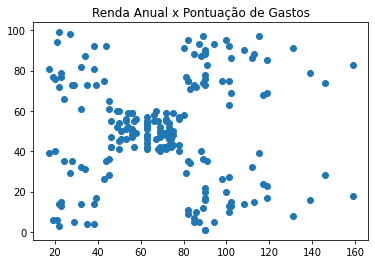

In [9]:
plt.scatter(x = 'Salario Anual (milhares)', y = 'Score Gastos (0-100)', data = df)
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

**EXECUÇÃO DO KMEANS COM 2 CLUSTERS**

[[43.24444444 50.28888889]
 [92.14545455 50.12727273]]


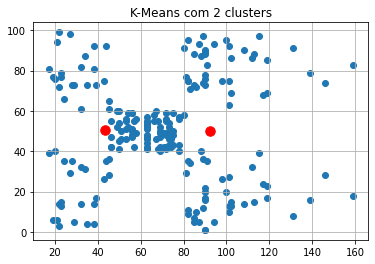

In [30]:
X2 = df[['Salario Anual (milhares)', 'Score Gastos (0-100)']].iloc[:,:].values

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)
print(kmeans.cluster_centers_) # mostra a coordenada dos centróides

plt.scatter(X2[:,0], X2[:,1])
plt.title('K-Means com 2 clusters')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=90, c='red')
plt.show() 

**EXECUÇÃO DO KMEANS COM 6 CLUSTERS**

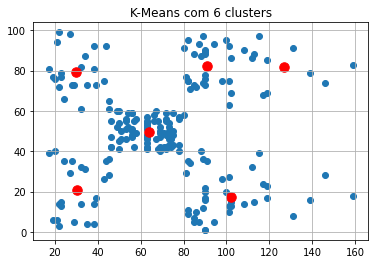

In [58]:
kmeans= KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])
plt.title('K-Means com 6 clusters')
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=90, c='red')
plt.show()

In [57]:
# mostra a coordenada dos centróides
print(kmeans.cluster_centers_) 

[[ 29.77272727  79.36363636]
 [102.11428571  17.11428571]
 [127.          82.        ]
 [ 30.43478261  20.91304348]
 [ 90.93103448  82.17241379]
 [ 64.09876543  49.51851852]]


### Curva do cotovelo 

A curva do cotovelo (elbow method), é um método para calcular o número ideal de clusters. É feito a soma dos quadrados intra-clusters (wcss -  within cluster sum of squares) sendo ideal o menor possivel, zero o melhor resultado. Para descobrir o cluster ideal é traçado uma reta que vai de uma extremidade a outra da curva, sendo o ponto ideal aquele que está mais distante da curvatura do gráfico. O K-Means também faz o cálculo do wcss, que se chama inertia_.

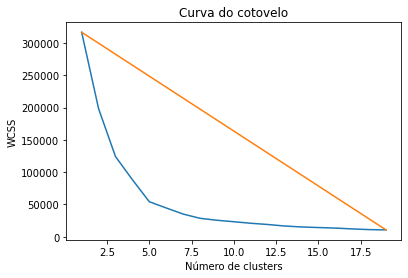

In [12]:
wcss = [] # Within cluster sum of squares
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Curva do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

**EXECUÇÃO DO KMEANS COM O NÚMERO IDEAL DE CLUSTERS**

In [20]:
print(kmeans.inertia_)

54185.05318347781


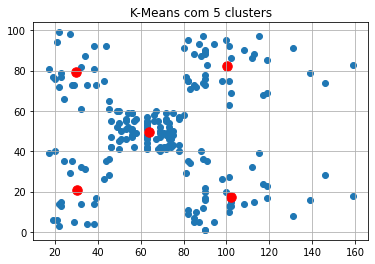

In [60]:
kmeans= KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])
plt.title('K-Means com 5 clusters')
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=90, c='red')
plt.show()

In [49]:
# mostra a coordenada dos centróides
print(kmeans.cluster_centers_) 

[[ 64.09876543  49.51851852]
 [100.17948718  82.12820513]
 [102.11428571  17.11428571]
 [ 29.77272727  79.36363636]
 [ 30.43478261  20.91304348]]
